In [153]:
#Imports
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def build_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_boundaries(clf, xx, yy, cmap=None):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    _, ax = plt.subplots()
    ax.pcolormesh(xx, yy, Z, cmap=cmap)
    return ax
    

Step 1
Load Wine dataset

In [154]:
dataset = load_wine()

Step 2
Select the first two attributes for a 2D representation of the image

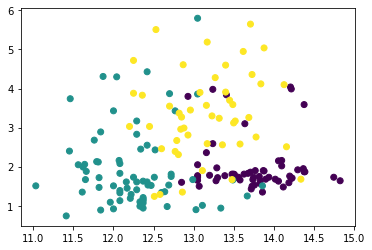

In [155]:
y_true = dataset.target
X = dataset.data[:,:2]

plt.scatter(X[:,0], X[:,1], c=y_true)
plt.show()


Step 3
Randomly split data into train, validation and test sets in proportion 5:2:3

In [156]:
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y_true, test_size=3/10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainVal, y_trainVal, test_size=2/7, random_state=42)

print(f"Proportion train:validation:test -> {round(10*len(X_train)/len(X))}:{round(10*len(X_val)/len(X))}:{round(10*len(X_test)/len(X))}")

Proportion train:validation:test -> 5:2:3


Step 4
For K = [1,3,5,7]:
1. Apply K-Nearest Neighbors
2. Plot the data and the decision boundaries
3. Evaluate the method on the validation set

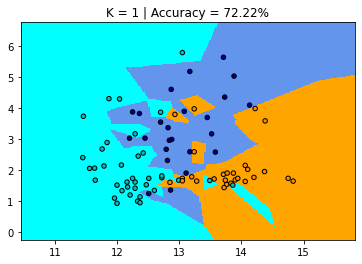

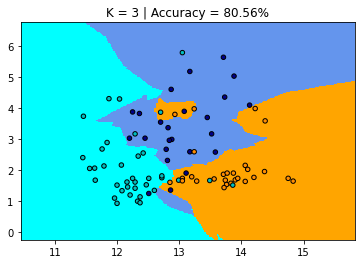

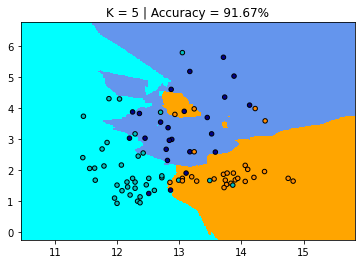

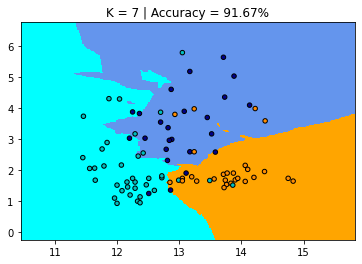

In [157]:
K = [1,3,5,7]
knns = [KNeighborsClassifier(n_neighbors=k) for k in K]

for knn in knns:
    knn.fit(X_train, y_train)

Ys_pred_knn = [knn.predict(X_val) for knn in knns]
accuracies_knn = [accuracy_score(y_val, y_pred) for y_pred in Ys_pred_knn]

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

#Build meshgrid and plot boundaries
xx,yy = build_meshgrid(X_train[:, 0], X[:, 1])
for knn,k,acc in zip(knns,K,accuracies_knn):
    ax = plot_boundaries(knn, xx, yy, cmap_light)
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cmap_bold, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"K = {k} | Accuracy = {acc*100:.2f}%")
plt.show()

Step 5
Plot a graph showing how the accuracy on the validation set 
varies when changing K

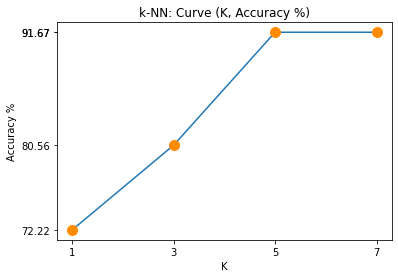

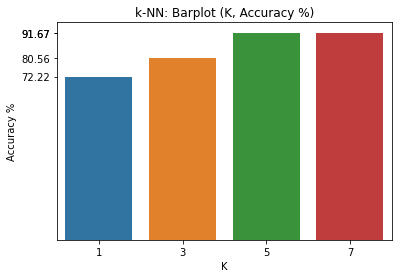

In [158]:
# Curve Graph
plt.figure()
plt.title('k-NN: Curve (K, Accuracy %)')
plt.scatter(K, np.array(accuracies_knn)*100, c="darkorange", s=100)
plt.plot(K, np.array(accuracies_knn)*100, zorder=-1)
plt.xlabel('K')
plt.ylabel('Accuracy %')
plt.minorticks_off()
plt.yticks(np.array(accuracies_knn)*100)
plt.xticks(K)

# Bar Plot
plt.figure()
plt.title('k-NN: Barplot (K, Accuracy %)')
sns.barplot(x=K, y=np.array(accuracies_knn)*100)
plt.xlabel('K')
plt.ylabel('Accuracy %')
plt.minorticks_off()
plt.yticks(np.array(accuracies_knn)*100)

plt.show()

Step 6
How the boundaries change? Why?

[...]

Step 7
Use the best value of K and evaluate the model on the test set.
How well does it works?
[...]

In [159]:
best_arg = np.argmax(accuracies_knn)
best_k = K[best_arg]
best_knn = knns[best_arg]
best_knn.fit(X_trainVal, y_trainVal)
accuracy_test = best_knn.score(X_test, y_test)
print(f"Knn accuracy on test set: {accuracy_test*100:.2f}% using k = {best_k}")

Knn accuracy on test set: 79.63% using k = 5


Step 8
For C = [0.001, 0.01, 0.1, 1, 10, 100,1000]:
a. Train a linear SVM on the training set
b. Plot the data and the decision boundaries
c. Evaluate the method on the validation set

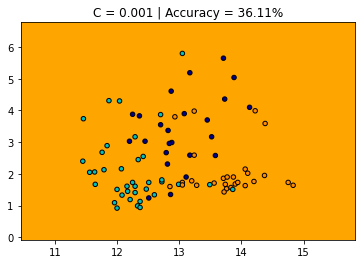

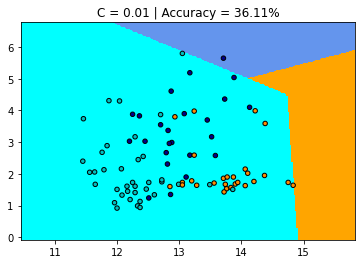

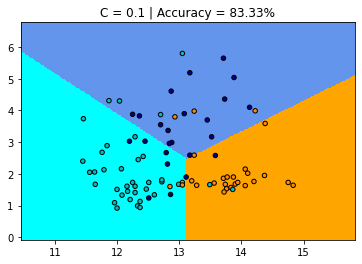

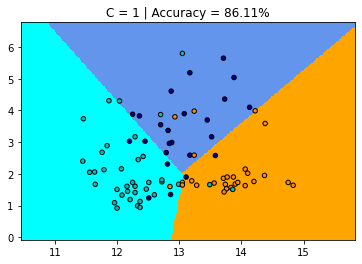

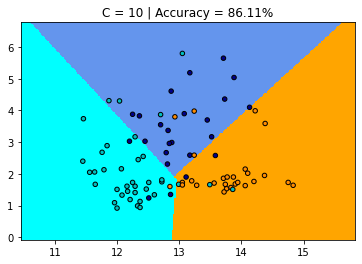

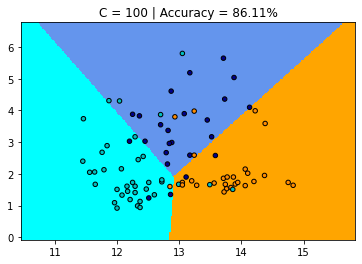

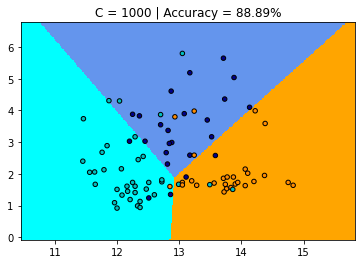

In [160]:
C = [0.001, 0.01, 0.1, 1, 10, 100,1000]
svms = [SVC(C=c, kernel='linear') for c in C]

for svm in svms:
    svm.fit(X_train, y_train)

Ys_pred_svm = [svm.predict(X_val) for svm in svms]
accuracies_svm = [accuracy_score(y_val, y_pred) for y_pred in Ys_pred_svm]

#Build meshgrid and plot boundaries
xx,yy = build_meshgrid(X_train[:,0], X_train[:,1])
for svm,c,acc in zip(svms,C,accuracies_svm):
    ax = plot_boundaries(svm, xx, yy, cmap=cmap_light)
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cmap_bold, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"C = {c} | Accuracy = {acc*100:.2f}%")

plt.show()

Step 9
Plot a graph showing how the accuracy on the validation set varies when
changing C

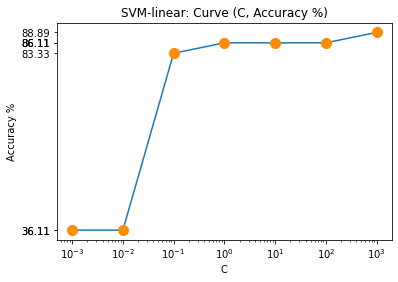

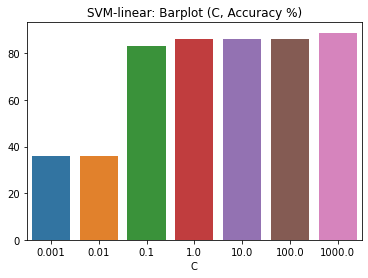

In [161]:
# Curve Graph
plt.figure()
plt.title('SVM-linear: Curve (C, Accuracy %)')
plt.scatter(C, np.array(accuracies_svm)*100, c="darkorange", s=100)
plt.plot(C, np.array(accuracies_svm)*100, zorder=-1)
plt.xlabel('C')
plt.ylabel('Accuracy %')
plt.minorticks_off()
plt.yticks(np.array(accuracies_svm)*100)
plt.xticks(C)
plt.xscale("log")
plt.xticks(C)

# Bar Plot
plt.figure()
plt.title('SVM-linear: Barplot (C, Accuracy %)')
sns.barplot(x=C, y=np.array(accuracies_svm)*100)
plt.xlabel('C')

plt.show()

Step 10
How the boundaries change? Why?
[...]

Step 11
Use the best value of C and evaluate the model on the test set.
How well does it works?
[...]

In [162]:
best_arg_svm = np.argmax(accuracies_svm)
best_c = C[best_arg_svm]
best_svm = svms[best_arg_svm]
best_svm.fit(X_trainVal, y_trainVal)
accuracy_test_svm = best_svm.score(X_test, y_test)
print(f"SVM-linear accuracy on test set: {accuracy_test_svm*100:.2f}% using C = {best_c}")

SVM-linear accuracy on test set: 74.07% using C = 1000


Step 12.1
Repeat point 8. (train, plot, etc..), but this time use an RBF kernel

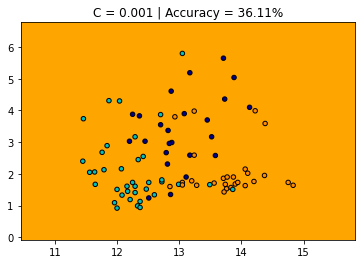

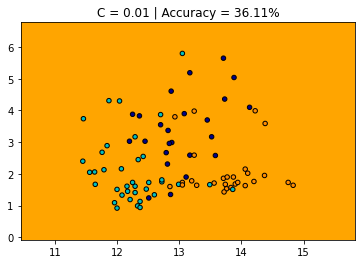

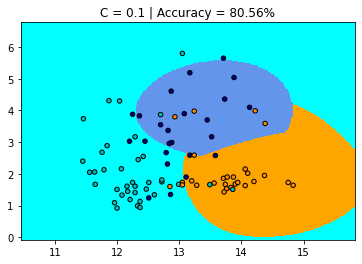

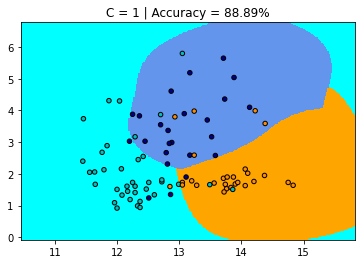

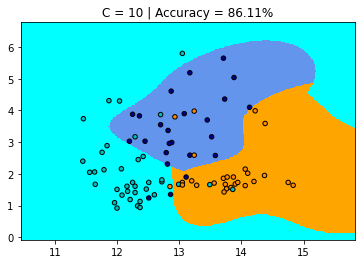

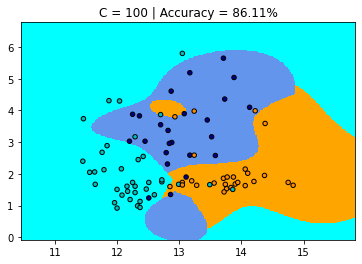

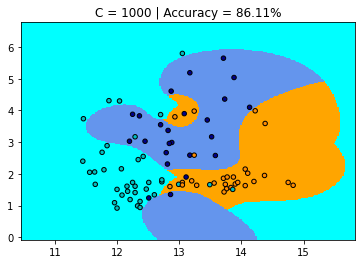

In [163]:
svms_rbf = [SVC(C=c, kernel='rbf', gamma='auto') for c in C]

for svm in svms_rbf:
    svm.fit(X_train, y_train)

Ys_pred_rbf = [svm.predict(X_val) for svm in svms_rbf]
accuracies_rbf = [accuracy_score(y_val, y_pred) for y_pred in Ys_pred_rbf]

#Build meshgrid and plot boundaries
xx,yy = build_meshgrid(X_train[:,0], X_train[:,1])
for svm,c,acc in zip(svms_rbf,C,accuracies_rbf):
    ax = plot_boundaries(svm, xx, yy, cmap=cmap_light)
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cmap_bold, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"C = {c} | Accuracy = {acc*100:.2f}%")

plt.show()

Step 12.2
Plot a graph showing how the accuracy on the validation set varies when
changing C

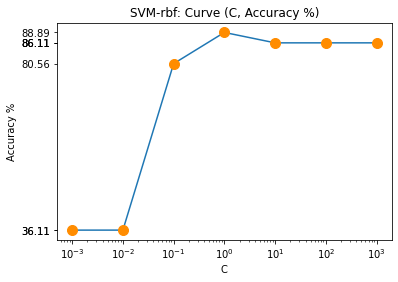

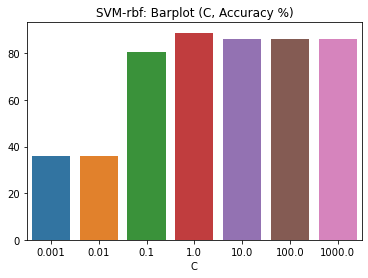

In [164]:
# Curve Graph
plt.figure()
plt.title('SVM-rbf: Curve (C, Accuracy %)')
plt.scatter(C, np.array(accuracies_rbf)*100, c="darkorange", s=100)
plt.plot(C, np.array(accuracies_rbf)*100, zorder=-1)
plt.xlabel('C')
plt.ylabel('Accuracy %')
plt.minorticks_off()
plt.yticks(np.array(accuracies_rbf)*100)
plt.xticks(C)
plt.xscale("log")
plt.xticks(C)

# Bar Plot
plt.figure()
plt.title('SVM-rbf: Barplot (C, Accuracy %)')
sns.barplot(x=C, y=np.array(accuracies_rbf)*100)
plt.xlabel('C')

plt.show()

Step 12.3
How the boundaries change? Why?
[...]

Step 12.4
Use the best value of C and evaluate the model on the test set.
How well does it works?
[...]

In [165]:
best_arg_rbf = np.argmax(accuracies_rbf)
best_c_rbf = C[best_arg_rbf]
best_rbf = svms_rbf[best_arg_rbf]
best_rbf.fit(X_trainVal, y_trainVal)
accuracy_test_rbf = best_rbf.score(X_test, y_test)
print(f"SVM-linear accuracy on test set: {accuracy_test_rbf*100:.2f}% using C = {best_c_rbf}")

SVM-linear accuracy on test set: 83.33% using C = 1
